In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv
/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv


# Demonstration of Data extraction, imputation, scaling, visualizing feature Distribution

week2/lec9-machine-learning-practice-diploma-iitm

## Importing basic libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

# 1. Feature Extraction

## DictVectorizer

DictVectorizer converts a list of dictionary objects to feature matrix

In [3]:
data = [{'age': 4, 'height':96.0},
        {'age': 1, 'height':73.9},
        {'age': 3, 'height':88.9},
        {'age': 2, 'height':81.6}]

Let's make use of DictVectorizer to convert the list of dictionary objects to the feature matrix.

In [4]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [5]:
data_transformed.shape

(4, 2)

# 2. Data Imputation

SkLearn library provides sklearn.impute.SimpleImputer class for this purpose

In [6]:
from sklearn.impute import SimpleImputer

## Data Imputation on real world dataset

In [7]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 
        'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                         header=None, names=cols)

The dataset has the following features:
1. Age(in years)
2. Sex (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (anything above 130-140 is typically cause for concern)
5. chol - serum cholestrol in mg/dl (above 200 is cause for concern)
6. fbs - fasting blood sugar (> 120 mg/dl) (1 = true; 0 =false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina
    * 1 = yes;
    * 0 = no
10. oldpeak - depression induced by exercise relative to rest
11. slope = slope of the peak exercise ST segment
    * 1 = upsloping;
    * 2 = flat Value;
    * 3 = downsloping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - (3 = normal; 6 = fixed defect; 7 = reversable defect)
`Labels`
14. num - diagnosis of heart disease (angiographic disease status) 
    * 0: < 50% diameter narrowing
    * 1: > 50% diamete narrowing

In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [9]:
(heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There are two non-numerical features: `ca` and `thal`

    * List their unique values

In [10]:
print("Unique values in ca:", heart_data.ca.unique())
print("Unique values n thal:", heart_data.thal.unique())

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values n thal: ['6.0' '3.0' '7.0' '?']


Both of them contain ?, which is a missing values. Let's count the number of missing values.

In [11]:
print("# minssing values in ca:", 
     heart_data.loc[heart_data.ca == '?', 'ca'].count())
print("# missing values in thal:",
     heart_data.loc[heart_data.thal == '?', 'thal'].count())

# minssing values in ca: 4
# missing values in thal: 2


### STEP 2: Replace '?' with nan.

In [12]:
heart_data.replace('?', np.nan, inplace=True)

### Step3: Fill missing values with sklearn missing value imputation utilities

Here, we use SimpleImputer with mean strategy.

We will try to variations-
    * add_indicator = False: Default choice that only imputes missing values

In [13]:
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


- add_indicator = True: Adds additional column for each column containing missing values. In our case, thsi adds two columns one for ca and other for thal. It indicates if the sample has a missing value.

In [14]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy='mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)

(303, 16)


# 3. Feature Scaling

Tree based ML algorithms are not affected by feature-scaling. In other words, feature scaling is not required for tree based ML algorithms.

Feature scaling can be performed with the following methods:
- Standardization
- Normalization
- MaxAbsScaler

Let's demonstrate feature scaling on a real world dataset. For this purpose we will be using `ablone dataaset`. We wil use different scaling utilities in sklearn library.

In [15]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 
       'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=cols)

**Abalone is an edible snell.** data is collected, in order to estimate their age based on their physical characteristic.

`Abalone dataset` has the following columns
1. sex-nominal(M, F, and I(infant))
2. Length (mm-Longest shell measurement)
3. Diameter (mm - perpendicular to length)
4. height (mm - with meat in shell)
5. Whole weight (grams  - whole abalone)
6. Shucked weight (grams - weight of meat)
7. Viscera weight (

**Step1:** Examine the dataset

Feature scaling is performed only on numerical attributes. Let's check which are numerical attributes in this dataset. WE can get that via info() method.

In [16]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**STEp1a:** [optional]: convert non-numerical attributes to numerical ones.

In this dataset, sex is a non-numeric columns in this dataset. Let's examine it and see if we can convert it to numeric representation.

In [17]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [18]:
# Assign numerical value to sex.
abalone_data = abalone_data.replace({"Sex": {"M":1,"F":2, "I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


### Step2: Separate labels from features.

In [19]:
y = abalone_data.pop("Rings")
print("The DataFrame object after deleting the column")
abalone_data.info()

The DataFrame object after deleting the column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


##### STEp 3: Examine feature scales

### Statistical method

Check the scale so different feature with describe() method of dataframe.

In [20]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


Note that
    - There are 4177 examples or rows in this dataset.
    - The mean and std. dev. of features are quite different from one another.
    
- We can confirm that with a variety fo visualization techinques and plots.

### Visualization of feature distributions

Visualize feature distributions

    - Histogram 
    - Kernel density estimation (KDE) plot
    - Box
    - Violin

Histogram

<AxesSubplot:xlabel='Sex', ylabel='Count'>

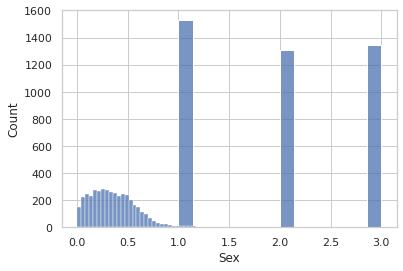

In [21]:
import seaborn as sns
sns.histplot(data=abalone_data, x='Sex')
sns.histplot(data=abalone_data, x='Shucked weight')

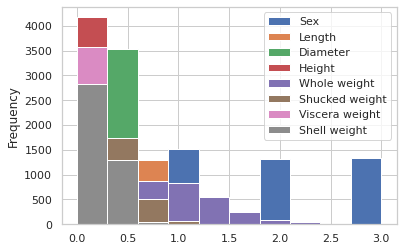

In [22]:
ax = abalone_data.plot.hist()

KDE plot

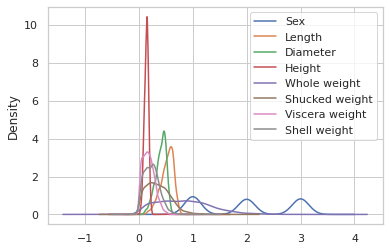

In [23]:
#@title [KDE plots - combined]
ax = abalone_data.plot.kde()

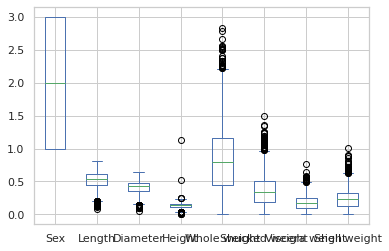

In [24]:
ax = abalone_data.plot.box()

In [25]:
#ax = abalone_data.plot.violin()

# Step4: Scaling

In [26]:
x = np.array([4, 2, 5, -2, -100]).reshape(-1, 1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [27]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


### MinMaxScalre

In [28]:
from sklearn.preprocessing import MinMaxScaler
x = abalone_data
mm = MinMaxScaler()
x_normalized = mm.fit_transform(x)
x_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [29]:
x_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [30]:
x_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

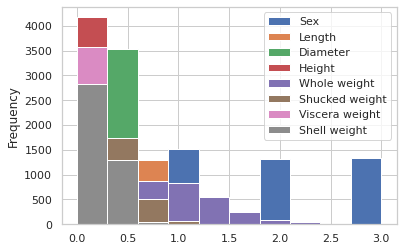

In [31]:
ax = abalone_data.plot.hist()

### STandardization

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardized = ss.fit_transform(x)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [33]:
X_standardized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [34]:
X_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
# #@title [Histogram - combined]
# # create a new plot
# plt.figure(figsize=(15, 8))
# data=pd.DataFrame(X_standardized, columns=in_cols)
# for colname in abalone_data:
#     plt.hist(data[colname].values, alpha=0.4)
    
# plt.legend(in_cols, fontsize=18, loc="upper right", frameon=True)
# plt.title('Distribution of features across samples after standardization')
# plt.xlabel('Range', fontsize=16)
# plt.ylabel('Frequencey', fontsize-16)

In [36]:
#ax=sns.boxplot(data=data, orient="h", palette="Set2")

# Dmonstration of Data transformation, Composite transformers

# 4. add_dummy_feature

augments dataset with a column vector, each value in the column vector is 1. This is useful for adding a prameter for bias term in the model

In [37]:
x = np.array(
    [[7, 1],
    [1, 8],
    [2, 0],
    [9, 6]])

from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


# 5. Custom transformers

In [38]:
from sklearn.preprocessing import FunctionTransformer

In [39]:
wine_data = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv", sep=";")

In [40]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Let's use np.log1p which returns natural logarithm of (1 + the feature value)

In [41]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


# 6. Polynomial Features

In [42]:
from sklearn.preprocessing import PolynomialFeatures

wine_data = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv", sep=";")
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'], axis=1)
print('Number of features after transformation=', wine_data.shape)

# Let us fit a polynomial of degree 2 to wine_data
poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print('Number of features after transformation = ', poly_wine_data.shape)

Number of features after transformation= (1599, 11)
Number of features after transformation =  (1599, 78)


Note that after transormation, we hae 78 features. Let's list out these features:

In [43]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

# 7. Discretization

In [44]:
# KBinDiscretizer discretizes features into k bins
from sklearn.preprocessing import KBinsDiscretizer

Let us demonstrate KBinsDiscretizer using Wine quality dataset

In [45]:
wine_data = wine_data_copy.copy()

# transform the dataset with KBinsDiscretizeer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
x = np.array(wine_data['chlorides']).reshape(-1, 1)
x_binned = enc.fit_transform(x)

In [46]:
x_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [47]:
# Since output is sparse, use to_array() to expand it.
x_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# 8. Handling Categorical Features

We need to convert the categorical fetures into numeric features

1. Ordinal encoding
2. One-hot encoding
3. Label encoder
4. Using dummy variables

In [48]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [49]:
cols = ['sepal length', 'sepal width','petal length',  'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The label is categorical attribute

In [50]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are three class labels. Let's convert them to one hot vectors.

### onehotencoder

In [51]:
onehotencoder = OneHotEncoder(categories='auto')
print('Shape of y before encoding', iris_data.label.shape)

'''
Passing 1d arrays as data to onehotencoder is deprecated in verssion,
hence reshape to (-1, 1) to have two dimensions.
Input of onehotencoder fit_transform must not be 1-rank array
'''

iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1, 1))

# y.reshape(-1, 1) is a 450*1 sparse matrix of type '<class 'numpy.float64'>'
# with 150 stored elements in Coordinate format.'
# y is a150x3 sparse matrix of type '<class 'numpy.float64'> with 150 stored
# elements in compressed sparse row format.
print('Shape of y after encoding', iris_labels .shape)

# since output is sparse use to _array() to expand it.

print("First 5 labes:")
print(iris_labels.toarray()[:5])

Shape of y before encoding (150,)
Shape of y after encoding (150, 3)
First 5 labes:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Let us observe the diff. b/w one hot encoding and ordinal encoding.

### ordinal Encoder

In [52]:
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1, 1))
print("Unique labels:", np.unique(iris_labels_transformed))

print("\nFirst 5 labels:")
print(iris_labels_transformed[:5])

Unique labels: [0. 1. 2.]

First 5 labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### LabelEncoder

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
# get the class column in a new variable
iris_labels = np.array(iris_data['label'])

# encode the class names to integers
le = LabelEncoder()
label_integer = le.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### MultilabelBinarizer

Encodes categorical features with value between 0 and k-1, where k is number of classes.

In [55]:
movie_genres = [{'action', 'comedy'},
                {'comedy'}, 
                {'action', 'thriller'},
                {'science-fiction', 'action', 'thriller'}]

In [56]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

### Using dummy variables

In [57]:
# use get_dummies to create a one-hot encoding for each unique categorical
# values in the 'class' column

# convert categorical class variable to one-hot encoding:
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


# 9. Composite Transformers

In [58]:
x = [
    [20.0, 'male',],
    [11.2, 'female',],
    [15.6, 'female',],
    [13.0, 'male',],
    [18.6, 'male',],
    [16.4, 'female',]
]
x = np.array(x)

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scaler', MaxAbsScaler(), [0]),
                        ('pass', 'passthrough', [0]),
                        ('encoder', OneHotEncoder(), [1])
                       ])
ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

# TransformedTargetRegressor

Transforms the target variable y before fitting a regression model.
- The predicted values are mapped back to the original space via an inverse transform.
- It takes regressor and transformer to be applied to the target variable as arguments

In [60]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)
X, y = X[:2000, :], y[:2000] # select a subset fo data

transformer = MaxAbsScaler()

# Two regressor - one based on the original label.
regressor = LinearRegression()

# Second regressor with transformed labels.
regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr.fit(X_train, y_train)
print('R2 score of raw label regression: {0:.2f}'.format(
        regr.score(X_test, y_test)))

raw_target_regr = LinearRegression().fit(X_train, y_train)
print('R2 score of transformed label regression: {0:.2f}'.format(
        raw_target_regr.score(X_test, y_test)))

R2 score of raw label regression: 0.59
R2 score of transformed label regression: 0.59


# Demonstration of Feature Selection, PCA, Pipelines, Handling class

# Feature Selection

sklearn.feature_selection module has useful APIs to select features/ reduce dimesionality, either to improve estimator's accuracy scores or to boost their performance on very high-dimensional datsets.

## Filter based methods

#### variance threshold

In [61]:
data = [{'age': 4, 'height': 96.0}, 
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6}]

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed, axis=0)

array([ 1.25 , 67.735])

In [62]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

#### SelectKBest

In [63]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# download data
X_california, y_california = fetch_california_housing(return_X_y=True)

# Select a subset of data
X, y = X_california[:2000, :], y_california[:2000]

print(f'Shape fo feature matrix before fature selection:{X.shape}')

Shape fo feature matrix before fature selection:(2000, 8)


Let's select 3 most important features, since it is a regression problem, we can use only mutual_info_regression or f_regression scoring functions only.

In [64]:
skb = SelectKBest(mutual_info_regression, k=3)
x_new = skb.fit_transform(X, y)
print(f'Shape of feature matrix after feature selection:{x_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


In [65]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

#### SelectPercentile

In [66]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile=30)
X_new = sp.fit_transform(X, y)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


In [67]:
sp.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

#### GenericUnivariateSelect


In [68]:
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression, mode='k_best', param=3)
X_new = gus.fit_transform(X, y)
print(f'Shape of feature matrix before selection:{X.shape}')
print(f'Shape of feature matrix after feature selction:{X_new.shape}')

Shape of feature matrix before selection:(2000, 8)
Shape of feature matrix after feature selction:(2000, 3)


## Wrapper based methods

#### RFE(Recursive Feature Elimination)
- **Step1**: Fits a model and
- **Step2**: Ranks the features, afterwards it removes one or more features (depending upon `step` parameter).

These two steps are repeated until desired number of features are selected.


In [69]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

# support_ attribute is a boolean array
# marking which features are selected
print(selector.support_)

# rank of each feature
# if it's value is '1', then it is selected
# features with rank 2 and onwards are ranked least.
print(f'Rank of each feature is: {selector.ranking_}')


[ True False False False False False  True  True]
Rank of each feature is: [1 5 4 3 6 2 1 1]


In [70]:
X_new = selector.transform(X)
print(f'Shape of feature matrix after feature selection: {X_new.shape}')

Shape of feature matrix after feature selection: (2000, 3)


### RFE-CV
this adds another layer of corsss validation to RFE


### SelectFromModel

Selects desired no. of important features (as specified with max_features parameter) above certain threshold of feature importance as obtained from the trained estimator.

- The feature importance is obtained via coef_, feature_importances_ or an importance_getter callable from the trainded estimator.

- The feature importance threshold can be specified either numerically or through string argument based on built in heuristics such as mean, median and float multiples of these like 0.1*mean

In [71]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X, y)

print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')
t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
print(f'shape of feature matrix after feature selection: {X_new.shape}')

Coefficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
shape of feature matrix after feature selection: (2000, 3)


### SequentialFeatureSelection
It performs feature selection by selecting or deselecting features one by one in greedy manner

In [72]:
from sklearn.feature_selection import SequentialFeatureSelector

In [73]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 164 ms, sys: 0 ns, total: 164 ms
Wall time: 163 ms


The features corrsponding to True in the output sfs.get_support() are selected. In this case, feature 1, 6 and 7 are selected.

In [74]:
%%time
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, 
                               direction='backward')
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 347 ms, sys: 114 ms, total: 461 ms
Wall time: 262 ms


A couple of observations:
 - Both forward and backward selection methods select the same features.
 - The backward selection method takes longer than forward selection method.
 
From above examples, we can observe that depending upon number of features, SFS can accomplish feature selection in different periods forward and backward.

# 11. PCA

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance.

It helps in reducing dimensions of a dataset, thus computational cost of next steps e.g. training model, cross validation etc. 

Lets generate some artificial data to better understand PCA:

Let's fit a PCA transformer on this data and compute its two principal components:


In [75]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(x)

Let's print the pricipal axes, they are two 2D vectors for this example. The PCA object returns them in the form of a matrix, where each column represents a principal component.

In [76]:
# print(f'The {pca.n_components_} principal axes are\n', pca.components_)

Let's also look at the explained variance corresponding to each principal axes.

In [77]:
# print('Explained variance by each component', pca.explained_variance_)


In [78]:
# print('Mean across x1 and x2 dimensions is:', pca.mean_)

To better understand PCA, lets visualize these principal axes.
   - There are two principal axes C1 and C2. They are orthogonal to each other. An additional vector C3 is also mentioned for comparison.
   - The lengths of C1 and C2 are taken as square root of respective explained variance. the length of the vector implies how important that vector is.
    

In [79]:
# # draw projections of data points on different vectors
# projections = x@pca.components_
# print(projections.shape)

# arbitrary_projections = x@c3
# print(arbitrary_projection.shape)


In [80]:
# # plt.figure(figsize=(8, 6))
# plt.scatter(projections[:, 0], 1+np.zeros((200, 1)), alpha=0.3, color='r')
# plt.scatter(projections[:, 1], -1+np.zeros((200, 1)), alpha=0.3, color='b')
# plt.scatter(arbitrary_projection, np.zeros((200,)), alpha=0.3, color='grey')
# plt.legend(['$\mathbf{c_1}$', '$\mathbf{c_2}$', '$\mathbf{c_3}'], prop={'size': 16})
# plt.title("Variance covered by different vectors", size=20)
# plt.ylim([-1.5, 1.5])
# plt.axis('equal')
# plt.grid(True)
# plt.yticks([], [])
# plt.xlabel('$z$', size = 20)
# plt.show()

## Reducing Dimensions

In [81]:
# pca = PCA(n_components=1)
# pca.fit(x)
# x_pca = pca.transform(x)
# print("original shape: ", x.shape )
# print("transformed shape: ", x_pca.shape)

# 12. Chaining Transformers

The preprocessing transformations are applied one after another on the input feature matrix.
    - It's important to apply exactly same transformation on training, evaluation and test set in the same order.
    
Failing to do so would lead to incorrect predictions from model due to distribution shift and hence incorrect performance evaluation.

sklearn.pipeline module provides utilities to build a composite estimator, as a chain of transformers and estimators.

## Pipeline

Sequentially apply a list of transformers and estimators.
   - Intermediate steps of the pipeline must be 'transformers' that is , they must implement fit and transform methods.
   - The final estimator only needs to implement fit.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

### Creating pipelines

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('standardScaler', StandardScaler()),
]
pipe = Pipeline(steps=estimators)

The same pipeline can also be reated vai make_pipeline() helper function, which doesn't take names of teh steps and assigns them generic names based on their steps.

In [83]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(), StandardScaler())

### Accessing individual steps in a pipeline

In [84]:
from sklearn.decomposition import PCA
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
]
pipe = Pipeline(steps=estimators)

In [85]:
# Let's print no. of steps in this pipeline:
print(len(pipe.steps))

3


In [86]:
# Let's look at each of the steps:
print(pipe.steps)

[('simpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]


The second estimator can be accesed in following 4 ways:

In [87]:
print(pipe.named_steps.pca)

PCA()


In [88]:
pipe.steps[1]

('pca', PCA())

In [89]:
pipe[1]

PCA()

In [90]:
pipe['pca']

PCA()

### Accessing parameters of a step in pipeline

Parameters of the estimators in the pipeline can be accessedd usnig the__syntax, note that there are two underscores b/w and

In [91]:
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA()),
    ('regressor', LinearRegression())
]
pipe = Pipeline(steps=estimators)

pipe.set_params(pca__n_components=2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

In above example n_components of PCA() step is set after the pipeline is created.

### GridSearch with pipeline

By using nameing convention of nested parameters, grid search can implemented.

In [92]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer=['passthrough',
                          SimpleImputer(),
                          KNNImputer()],
                 clf=[SVC(), LogisticRegression()],
                 clf__c=[0.1, 10, 100])

grid_search = GridSearchCV(pipe, param_grid=param_grid)

* c is an inverse of regularization, lower its value stronger the regularization is.
* in the example above clf__c provides a set of values for grid search.

### Caching Transformers

Transforming data is computationally expensive step.
   * For grid search, transformers need not be applied for every parameter configuration. They can be applied only once, and then transformed data can reused.

this can be achieved by setting memory parameter of a pipeline object.

In [93]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()

In [94]:
estimators = [
    ('simpleImputer', SimpleImputer()),
    ('pca', PCA(2)),
    ('regressor', LinearRegression())
]
pipe = Pipeline(steps=estimators, memory=tempDirPath)

FeatureUnion

Concatenates results of multiple transformer objects.
 * Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.
FeatureUnion and Pipeline can be used to create complex transformers.

# 13. Visualizing Pipelines

In [95]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('selector', ColumnTransformer([('select_first_4',
                                                         'passthrough',
                                                         slice(0, 4))])),
                        ('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler()),
                        ])

cat_pipeline = ColumnTransformer([('label_binarizer', LabelBinarizer(), [4]),])

full_pipeline = FeatureUnion(transformer_list=
                            [("num_pipeline", num_pipeline),
                             ("cat_pipeline", cat_pipeline),
                            ])

In [96]:
from sklearn import set_config
set_config(display='diagram')
# displays HTML representation in a jupyter context
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

# 14. Handling imbalanced data

Imbalanced datasets are those where one class is vey less represented than the other class. This. kind of data results in less efficient ML algorithms

There are two main approaches to handle imbalanced data:
   * Undersampling
   * OverSampling

### handling imbalance dataset with help of `Wine quality dataset`

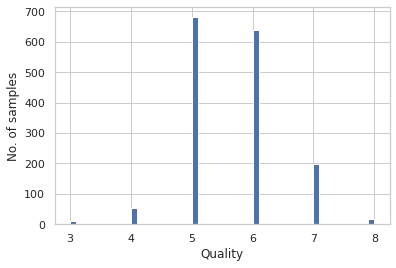

In [97]:
wine_data = pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
        "winequality-red.csv",
        sep=";")

# display the histogram of the targetd variable 'quality'
wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('No. of samples')
plt.show()

In [98]:
wine_data.shape

(1599, 12)

## Undersampling

Undersampling refers to sampling from the majority class in order to keep only a part of these data points.

It may be carried out using RandomUnderSampler class from imblearn library

In [99]:
from imblearn.under_sampling import RandomUnderSampler


In [100]:
# class count
class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()

# separate class
class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]

# print the shape of the class
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)


class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)


In [101]:
from collections import Counter # it allows us to count the items in an iterable list.

x = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state=0)
x_rus, y_rus = undersample.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_rus))

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape: Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


### OverSampling

Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. This might consist of either replicating or generating synthetic data for the minority class.

It may be carried out using **RandomOverSampler** class from **imblearn** library

In [102]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

original dataset shape: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [103]:
print(x_ros.shape[0] - x.shape[0], 'New random points generated with RamdomOverSampler')

2487 New random points generated with RamdomOverSampler


The class with the majority no. of sample is '5'. Hence all the other class samples that are lesser than this class count are newly sampled to the no. of smapler in the majority class

### 4.2 Oversampling using SMOTE


SMOTE(Synthetic Minority Oversampling Technique) is a popular technique for oversmapling. It is available under imblearn library.

In [104]:
from imblearn.over_sampling import SMOTE


In [105]:
oversample = SMOTE()
x_sm, y_sm = oversample.fit_resample(x, y)
counter = Counter(y_sm)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [106]:
print(x_sm.shape[0] - x.shape[0], 'New random points generated with SMOTE')

2487 New random points generated with SMOTE


TYPES OF SMOTE
* Borderline SMOTE
* Borderline-SMOTE SVM
* Adaptive Synthetic Sampling(ADASYN)